In [1]:
import ampal
import isambard
import isambard.specifications as specs
import isambard.modelling as modelling
import isambard.optimisation.evo_optimizers as ev_opts
from isambard.optimisation.evo_optimizers import Parameter
import budeff

import matplotlib.pyplot as plt
import numpy as np
import itertools
from pprint import pprint
import nglview as nv
from contextlib import redirect_stdout

%matplotlib inline

In [2]:
def show_ball_and_stick(ampal):
    view = nv.show_text(ampal.pdb)
    view.add_ball_and_stick()
    view.remove_cartoon()
    return view

In [3]:
REGISTER_ADJUST = {
    'a': 0,
    'b': 102.8,
    'c': 205.6,
    'd': 308.4,
    'e': 51.4,
    'f': 154.2,
    'g': 257
}

In [4]:
specification = specs.CoiledCoil.from_parameters

In [5]:
sequences = ['GELAAIKQELAAIKKELAAIKWELAAIKQGAG', 'GELAAIKQELAAIKKELAAIKWELAAIKQGAG']

In [6]:
parameters = [
    Parameter.static('Oligomeric State', 2),
    Parameter.static('Helix Length', 32),
    Parameter.dynamic('Radius', 5.0, 1.0),
    Parameter.dynamic('Pitch', 150, 60),
    Parameter.dynamic('PhiCA', REGISTER_ADJUST['f'], 27),  
]

In [7]:
default_values = [x.default_value for x in parameters]
print(default_values)

[2, 32, 5.0, 150, 154.2]


In [8]:
def get_bude_total_energy(ampal_object):
    return budeff.get_internal_energy(ampal_object).total_energy

### Genetic Algorithm

In [9]:
opt_ga = ev_opts.GA(specification, sequences, parameters, get_bude_total_energy)

In [10]:
opt_ga.run_opt(100, 30, cores=8)

gen	evals	avg     	std   	min     	max     
0  	84   	-920.237	44.549	-1055.65	-855.449
1  	66   	-964.047	42.7497	-1082.26	-905.155
2  	74   	-1002.83	37.7535	-1082.26	-946.145
3  	58   	-1029.38	33.1391	-1083.24	-976.105
4  	66   	-1056.44	23.8728	-1086.8 	-1008.37
5  	70   	-1074.39	10.5102	-1086.8 	-1041.79
6  	72   	-1080.73	2.00547	-1086.8 	-1076.08
7  	69   	-1082.43	1.41893	-1086.8 	-1080.11
8  	77   	-1083.61	1.30966	-1086.8 	-1081.82
9  	66   	-1084.66	1.25833	-1087.15	-1082.63
10 	72   	-1085.76	0.880354	-1087.15	-1083.97
11 	66   	-1086.37	0.453973	-1087.15	-1085.37
12 	65   	-1086.61	0.313121	-1087.19	-1085.84
13 	74   	-1086.8 	0.179422	-1087.19	-1086.47
14 	74   	-1086.88	0.14791 	-1087.2 	-1086.63
15 	68   	-1086.95	0.125728	-1087.23	-1086.73
16 	88   	-1087.02	0.111795	-1087.26	-1086.82
17 	59   	-1087.07	0.0944078	-1087.31	-1086.89
18 	79   	-1087.12	0.0660575	-1087.31	-1087.01
19 	79   	-1087.14	0.0660269	-1087.31	-1087.04
20 	67   	-1087.16	0.0621938	-1087.36	-1087.

In [11]:
optimized_model_ga = opt_ga.best_model

In [12]:
budeff.get_internal_energy(optimized_model_ga).total_energy

-1087.3832352689546

In [13]:
funnel_data_ga = opt_ga.make_energy_funnel_data()

In [14]:
xs = [x[0] for x in funnel_data_ga]
ys = [x[1] for x in funnel_data_ga]
zs = [x[2] for x in funnel_data_ga]

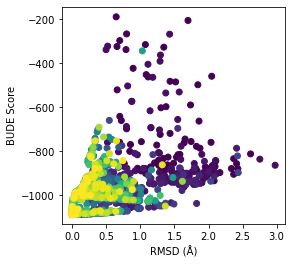

In [16]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUDE Score')

fig.savefig('ga.png')

In [15]:
f = open('d_CC-Tet_dimer-optimized-model-ga.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_ga.pdb)

### Differential Evolution

In [17]:
opt_de = ev_opts.DE(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [18]:
opt_de.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min    	max     
0  	100  	-861.163	107.533	-1022.2	-353.862
1  	100  	-902.996	45.1216	-1022.2	-806.513
2  	100  	-922.855	47.8458	-1025.19	-813.607
3  	100  	-943.259	44.6585	-1033.54	-843.77 
4  	100  	-958.156	42.7947	-1082.21	-843.77 
5  	100  	-971.857	37.8269	-1082.21	-891.977
6  	100  	-984.458	39.2217	-1082.21	-891.977
7  	100  	-996.276	37.7044	-1082.21	-891.977
8  	100  	-1008.76	35.1816	-1082.21	-925.826
9  	100  	-1020.64	28.7603	-1082.21	-942.588
10 	100  	-1029.31	26.3265	-1084.18	-970.314
11 	100  	-1035.77	24.3357	-1084.18	-982.85 
12 	100  	-1041.33	22.4264	-1084.18	-999.387
13 	100  	-1046.48	20.9445	-1084.18	-1002.28
14 	100  	-1052.38	19.6271	-1084.18	-1002.28
15 	100  	-1057.16	19.5538	-1084.38	-1002.28
16 	100  	-1062.46	16.8294	-1084.38	-1017.14
17 	100  	-1066.07	15.0557	-1084.38	-1017.14
18 	100  	-1069.25	13.1903	-1084.92	-1028.61
19 	100  	-1072.93	10.5454	-1085.14	-1028.61
20 	100  	-1075.26	8.93044	-1085.62	-1039.92
21 	100  	-10

In [19]:
optimized_model_de = opt_de.best_model
budeff.get_internal_energy(optimized_model_de).total_energy

-1087.3358941976162

In [20]:
funnel_data_de = opt_de.make_energy_funnel_data()

In [21]:
xs = [x[0] for x in funnel_data_de]
ys = [x[1] for x in funnel_data_de]
zs = [x[2] for x in funnel_data_de]

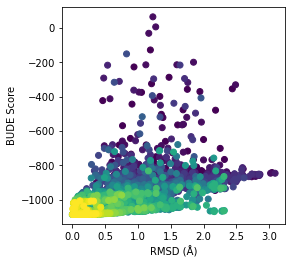

In [22]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUDE Score')

fig.savefig('de.png')

In [23]:
f = open('d_CC-Tet_dimer-optimized-model-de.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_de.pdb)

### Particle Swarm Optimisation

In [24]:
opt_pso = ev_opts.PSO(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [25]:
opt_pso.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max   
0  	100  	-798.904	222.804	-1032.63	193.95
1  	90   	-813.107	220.008	-1065.63	193.95
2  	86   	-862.36 	155.109	-1074.07	-316.971
3  	94   	-855.27 	125.391	-1038.39	-186.579
4  	93   	-851.721	179.242	-1086   	262.782 
5  	92   	-761.309	279.789	-1077.03	292.04  
6  	85   	-822.213	220.13 	-1046.53	292.04  
7  	91   	-857.88 	133.246	-1031.66	-121.783
8  	93   	-863.993	133.349	-1004.15	-356.884
9  	91   	-812.387	209.195	-1078.75	206.378 
10 	88   	-853.044	174.679	-1076.64	206.378 
11 	89   	-700.564	243.256	-1074.72	206.378 
12 	95   	-851.723	140.616	-1044.4 	-359.371
13 	92   	-777.671	227.245	-1076.2 	125.069 
14 	81   	-807.001	188.337	-1068.95	34.4683 
15 	83   	-853.967	142.073	-1035.11	34.4683 
16 	89   	-861.928	138.721	-1063.1 	-222.38 
17 	96   	-766.672	251.87 	-1064.4 	266.48  
18 	88   	-802.468	237.11 	-1066.39	266.48  
19 	76   	-854.51 	181.152	-1076.03	266.48  
20 	89   	-876.793	106.864	-1067.29	-355.072
21 	95   	-770.6

In [26]:
optimized_model_pso = opt_pso.best_model
budeff.get_internal_energy(optimized_model_pso).total_energy

-1085.9953679739551

In [27]:
funnel_data_pso = opt_pso.make_energy_funnel_data()

In [28]:
xs = [x[0] for x in funnel_data_pso]
ys = [x[1] for x in funnel_data_pso]
zs = [x[2] for x in funnel_data_pso]

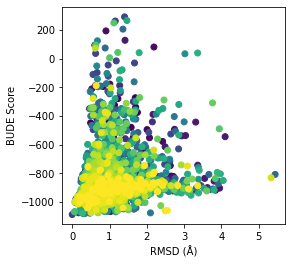

In [29]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUDE Score')

fig.savefig('pso.png')

In [30]:
f = open('d_CC-Tet_dimer-optimized-model-pso.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_pso.pdb)

### Covariance Matrix Adaptive Evolutionary Strategy

In [31]:
opt_cmaes = ev_opts.CMAES(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [32]:
opt_cmaes.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max     
0  	100  	-811.239	165.519	-1051.46	-287.164
1  	100  	-820.062	131.473	-1028.79	-356.259
2  	100  	-911.499	67.1607	-1069.02	-608.025
3  	100  	-956.596	54.9157	-1076.83	-652.271
4  	100  	-984.282	39.9734	-1081.47	-838.317
5  	100  	-983.396	51.1987	-1081.44	-778.956
6  	100  	-994.015	39.3969	-1085.94	-877.608
7  	100  	-999.447	68.4318	-1083.29	-696.798
8  	100  	-1013.98	44.9403	-1083.75	-842.212
9  	100  	-1016.1 	45.6931	-1084.19	-815.351
10 	100  	-1025.25	34.7993	-1084.45	-942.268
11 	100  	-1034.48	37.7634	-1087.15	-955.011
12 	100  	-1022.46	42.2196	-1086.02	-948.945
13 	100  	-1031.51	38.6777	-1086.69	-962.352
14 	100  	-1058.84	34.229 	-1086.83	-978.131
15 	100  	-1080.32	15.8108	-1087.13	-1007.57
16 	100  	-1061.5 	32.0843	-1086.83	-996.914
17 	100  	-1083.85	11.3709	-1087.22	-1021.43
18 	100  	-1064.26	30.5009	-1087.6 	-1005.2 
19 	100  	-1079   	18.1973	-1087.46	-1016.71
20 	100  	-1070.7 	25.7323	-1087.58	-1019.77
21 	100  	

In [33]:
optimized_model_cmaes = opt_cmaes.best_model
budeff.get_internal_energy(optimized_model_cmaes).total_energy

-1087.7727620681176

In [34]:
funnel_data_cmaes = opt_cmaes.make_energy_funnel_data()

In [35]:
xs = [x[0] for x in funnel_data_cmaes]
ys = [x[1] for x in funnel_data_cmaes]
zs = [x[2] for x in funnel_data_cmaes]

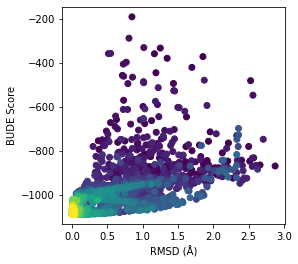

In [36]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUDE Score')

fig.savefig('cmaes.png')

In [37]:
f = open('d_CC-Tet_dimer-optimized-model-cmaes.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_cmaes.pdb)